### LIBRERIAS

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import json
import ast
import warnings
import pyarrow as pa
import pyarrow.parquet as pq
warnings.filterwarnings('ignore')

### EDA al dataset user_reviews

- El analisis exploratorio de los datos se hará sobre el dataset al que previamente se le realizó un proceso de ETL donde se reservaron las columnas utiles a los fines del proyecto.


In [8]:
# Se carga el archivo para generar un dataframe 
user_reviews = pd.read_parquet('datos_parquet/user_reviews.parquet')
user_reviews

,user_id,id,recommend,review_year,sentiment_analysis
0,76561197970982479,1250,True,2011,2
1,76561197970982479,22200,True,2011,2
2,76561197970982479,43110,True,2011,2
3,js41637,251610,True,2014,2
4,js41637,227300,True,2013,2
...,...,...,...,...,...
59328,76561198312638244,70,True,2015,2
59329,76561198312638244,362890,True,2015,2
59330,LydiaMorley,273110,True,2015,2
59331,LydiaMorley,730,True,2015,2


In [9]:
user_reviews.info()

<class 'pandas.core.frame.DataFrame'>
Index: 58457 entries, 0 to 59332
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   user_id             58457 non-null  object
 1   id                  58431 non-null  Int64 
 2   recommend           58431 non-null  object
 3   review_year         58457 non-null  int32 
 4   sentiment_analysis  58457 non-null  int64 
dtypes: Int64(1), int32(1), int64(1), object(2)
memory usage: 2.5+ MB


El dataset 'user_reviews' posee 5 columnas y 58457 registros.

El contenido de las columnas es el siguiente:
- user_id: elemento identificador de cada usuario que realizó una review. Dato tipo str
- id: elemento identificador de cada titulo registrado en el dataset. Dato tipo int
- recommend: verifica si existe o no una reseña. Dato tipo bool
- review_year: año en el que se realizo la reseña. Dato tipo int
- sentiment_analysis: puntaje de acuerdo al tipo de reseña dada. Dato tipo int


In [11]:
# Se verifica cantidad de nulos por columna
user_reviews.isnull().sum()

user_id                0
id                    26
recommend             26
review_year            0
sentiment_analysis     0
dtype: int64

In [12]:
# Se verifican la cantidad de datos unicos por columna
user_reviews.nunique()

user_id               25484
id                     3682
recommend                 2
review_year               6
sentiment_analysis        3
dtype: int64

In [13]:
# Se realiza un recuento de cada puntaje para entender su distribución
user_reviews['sentiment_analysis'].value_counts()

sentiment_analysis
2    36843
1    12132
0     9482
Name: count, dtype: int64

In [14]:
no_recomienda = user_reviews['recommend'].eq(False).sum()

si_recomienda = user_reviews['recommend'].eq(True).sum()

total_recomienda = si_recomienda + no_recomienda

print(f'De los {total_recomienda} registros totales, hay {si_recomienda} registros que han sido recomendados frente a {no_recomienda} de registros no recomendados')

De los 58431 registros totales, hay 51692 registros que han sido recomendados frente a 6739 de registros no recomendados


In [15]:
# Se calcula el porcentaje de cada puntaje del analisis de sentimiento.
positivos = round(((user_reviews['sentiment_analysis'].eq(2).sum())/len(user_reviews))*100,2)
neutros = round(((user_reviews['sentiment_analysis'].eq(1).sum())/len(user_reviews))*100,2)
negativos = round(((user_reviews['sentiment_analysis'].eq(0).sum())/len(user_reviews))*100,2)
positivos , neutros, negativos

(63.03, 20.75, 16.22)

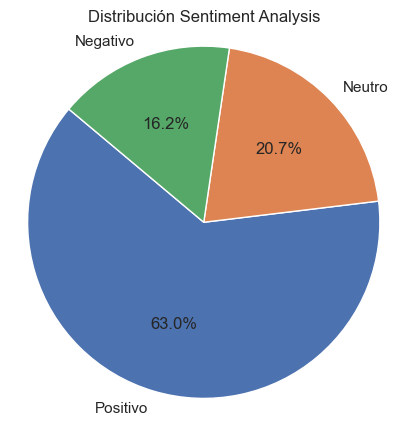

In [19]:
# Para mejor interpretación de los porcentajes se crea un piechart
sizes = positivos , neutros, negativos
etiqueta = 'Positivo', 'Neutro', 'Negativo'
sns.set_theme()

plt.figure(figsize=(5,5))
plt.pie(sizes,labels=etiqueta, autopct='%1.1f%%', startangle=140)

plt.title('Distribución Sentiment Analysis')
plt.axis('equal')

plt.show()

Sobre el dataset user_reviews se puede decir que: 
- No posee datos nulos.
- Las reviews positivas predominan con un 63.05% del total del dataset.
- De los 58457 registros, hay 25458 usuarios que realizaron una review, por lo que se deduce que, en su mayoria, los usuarios han hecho una review a mas de un titulo. 